# Import module yang dibutuhkan

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [43]:
df = pd.read_csv('CarRentalData.csv')

In [44]:
df.head(10)

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010
5,GASOLINE,5.00,13,12,Albuquerque,US,35.068834,-106.576111,NM,7815747,58,Mercedes-Benz,GL-Class,suv,2012
6,GASOLINE,4.42,13,12,Albuquerque,US,35.045552,-106.633815,NM,3112016,42,GMC,Yukon XL,suv,2005
7,GASOLINE,4.90,12,10,Albuquerque,US,35.186542,-106.686481,NM,9536762,117,Ford,Expedition,suv,2018
8,GASOLINE,5.00,1,1,Albuquerque,US,35.061213,-106.629406,NM,14893743,102,Ford,Focus RS,car,2016
9,GASOLINE,4.76,22,17,Albuquerque,US,35.115363,-106.556911,NM,11389136,49,Ford,EcoSport,suv,2018


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5776 non-null   object 
 1   rating              5350 non-null   float64
 2   renterTripsTaken    5851 non-null   int64  
 3   reviewCount         5851 non-null   int64  
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   int64  
 10  rate.daily          5851 non-null   int64  
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 685.8+

# Subset feature dan target

In [46]:
X = df.iloc[:,:-1] # Target
y = df.iloc[:,-1] # Feature

# Bagi dataset menjadi Training Set dan Testing Set dengan proporsi 70:30

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [48]:
print("Dimensi X_train: ", X_train.shape)
print("Dimensi X_test: ", X_test.shape)
print("Dimensi y_train: ", y_train.shape)
print("Dimensi y_test: ", y_test.shape)

Dimensi X_train:  (4095, 14)
Dimensi X_test:  (1756, 14)
Dimensi y_train:  (4095,)
Dimensi y_test:  (1756,)


# Lakukan normalisasi data pada salah satu attribute menggunakan Min Max scaler (buatlah copy dataset terlebih dahulu)

In [49]:
dfClone = pd.read_csv('CarRentalData.csv')

In [50]:
mms = MinMaxScaler()

In [51]:
x_scaled = mms.fit_transform(dfClone[["renterTripsTaken","rating","reviewCount"]])


In [52]:
dfClone.head(10)

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010
5,GASOLINE,5.00,13,12,Albuquerque,US,35.068834,-106.576111,NM,7815747,58,Mercedes-Benz,GL-Class,suv,2012
6,GASOLINE,4.42,13,12,Albuquerque,US,35.045552,-106.633815,NM,3112016,42,GMC,Yukon XL,suv,2005
7,GASOLINE,4.90,12,10,Albuquerque,US,35.186542,-106.686481,NM,9536762,117,Ford,Expedition,suv,2018
8,GASOLINE,5.00,1,1,Albuquerque,US,35.061213,-106.629406,NM,14893743,102,Ford,Focus RS,car,2016
9,GASOLINE,4.76,22,17,Albuquerque,US,35.115363,-106.556911,NM,11389136,49,Ford,EcoSport,suv,2018


### Normalilasi dengan metode Z-Score

In [53]:
dfClone["renterTripsTaken"] = dfClone["renterTripsTaken"] / dfClone["renterTripsTaken"].std()
dfClone["reviewCount"] = dfClone["reviewCount"] / dfClone["reviewCount"].std()

In [54]:
dfClone.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,0.310270,0.341529,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,0.047734,0.028461,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,0.668274,0.683058,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,0.501206,0.569215,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,0.071601,0.028461,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010


# Lakukan standarisasi pada dataset (buatlah copy dataset terlebih dahulu)

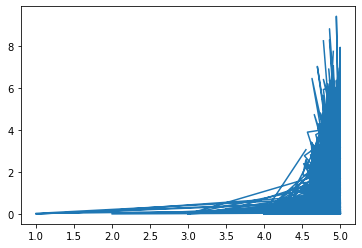

In [55]:
plt.plot(dfClone.rating, dfClone.renterTripsTaken)
plt.show()

In [56]:
ss = StandardScaler()

In [57]:
x_skala = ss.fit_transform(dfClone[["renterTripsTaken","rating"]])

In [58]:
data_standardisasi = pd.DataFrame(x_skala)

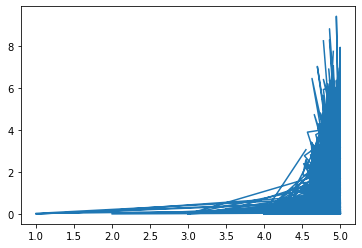

In [59]:
plt.plot(dfClone.rating, dfClone.renterTripsTaken)
plt.show()

# Lakukan Data cleaning pada data dengan nilai null (jika tidak ada nilai null pada dataset, maka buatlah menjadi ada). Ganti nilai null sesuai ketentuan. (bilangan bulat : median/modus, bilangan desimal : mean, tulisan : modus). Nilai plus jika strategy yang digunakan menggunakan 3 nilai

In [60]:
print("Berikut Ini adalah Data sebelum dicleaning :")
df.isna().sum()

Berikut Ini adalah Data sebelum dicleaning :


fuelType               75
rating                501
renterTripsTaken        0
reviewCount             0
location.city           0
location.country        0
location.latitude       0
location.longitude      0
location.state          0
owner.id                0
rate.daily              0
vehicle.make            0
vehicle.model           0
vehicle.type            0
vehicle.year            0
dtype: int64

In [61]:
imputer = SimpleImputer(strategy="mean")
imputerString = SimpleImputer(strategy="most_frequent")

In [62]:
df['rating'] = imputerString.fit_transform(df[['rating']])

In [63]:
df['fuelType'] = imputerString.fit_transform(df[['fuelType']])

In [64]:
print("Berikut Ini adalah Data setelah dicleaning :")
df.isna().sum()

Berikut Ini adalah Data setelah dicleaning :


fuelType              0
rating                0
renterTripsTaken      0
reviewCount           0
location.city         0
location.country      0
location.latitude     0
location.longitude    0
location.state        0
owner.id              0
rate.daily            0
vehicle.make          0
vehicle.model         0
vehicle.type          0
vehicle.year          0
dtype: int64

In [65]:
df[5:80]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
5,GASOLINE,5.00,13,12,Albuquerque,US,35.068834,-106.576111,NM,7815747,58,Mercedes-Benz,GL-Class,suv,2012
6,GASOLINE,4.42,13,12,Albuquerque,US,35.045552,-106.633815,NM,3112016,42,GMC,Yukon XL,suv,2005
7,GASOLINE,4.90,12,10,Albuquerque,US,35.186542,-106.686481,NM,9536762,117,Ford,Expedition,suv,2018
8,GASOLINE,5.00,1,1,Albuquerque,US,35.061213,-106.629406,NM,14893743,102,Ford,Focus RS,car,2016
9,GASOLINE,4.76,22,17,Albuquerque,US,35.115363,-106.556911,NM,11389136,49,Ford,EcoSport,suv,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,GASOLINE,4.84,71,58,East Point,US,33.652323,-84.491513,GA,7697843,29,smart,fortwo,car,2015
76,GASOLINE,5.00,17,16,Decatur,US,33.753970,-84.234782,GA,15117491,78,BMW,Z4,car,2008
77,GASOLINE,4.89,9,9,Atlanta,US,33.926688,-84.343004,GA,511103,102,Chevrolet,Camaro,car,2018
78,GASOLINE,4.93,19,15,Atlanta,US,33.810233,-84.453160,GA,2052844,85,Land Rover,Range Rover Evoque,suv,2015


In [66]:
df[df.isnull().any(axis=1)]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year


# Lakukan Data cleaning pada data dengan nilai duplikat. (Jika tidak ada nilai duplikat pada dataset, maka buatlah menjadi ada)

In [67]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5846    False
5847    False
5848    False
5849    False
5850    False
Length: 5851, dtype: bool

In [68]:
df[df.duplicated()]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year


In [69]:
df.drop_duplicates(inplace=True)

In [70]:
df[df.duplicated()]

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year


In [71]:
df.duplicated().sum()

0

In [72]:
df.duplicated().any()

False

# Ganti tipe data salah satu attribute angka

In [73]:
df.dtypes

fuelType               object
rating                float64
renterTripsTaken        int64
reviewCount             int64
location.city          object
location.country       object
location.latitude     float64
location.longitude    float64
location.state         object
owner.id                int64
rate.daily              int64
vehicle.make           object
vehicle.model          object
vehicle.type           object
vehicle.year            int64
dtype: object

In [74]:
encoder = OrdinalEncoder()
df['vehicleyearEncoded'] = encoder.fit_transform(df[['vehicle.year']])

In [75]:
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,vehicleyearEncoded
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019,32.0
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018,31.0
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012,25.0
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018,31.0
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010,23.0


In [76]:
df.dtypes

fuelType               object
rating                float64
renterTripsTaken        int64
reviewCount             int64
location.city          object
location.country       object
location.latitude     float64
location.longitude    float64
location.state         object
owner.id                int64
rate.daily              int64
vehicle.make           object
vehicle.model          object
vehicle.type           object
vehicle.year            int64
vehicleyearEncoded    float64
dtype: object

# Lakukan one hot encoding pada dataset yang kalian miliki.

In [77]:
encoderHot = OneHotEncoder(sparse=False)

In [78]:
yearEnc = encoder.fit_transform(df[['vehicle.year']])

In [79]:
yearHotEnc = pd.DataFrame(yearEnc)

In [80]:
df = df.join(yearHotEnc)

In [81]:
df.head()

,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,vehicleyearEncoded,0
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019,32.0,32.0
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018,31.0,31.0
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012,25.0,25.0
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018,31.0,31.0
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010,23.0,23.0


# POSTTEST 5

## Melihat Data Set Bernilai Null

In [82]:
df.isna().sum()

fuelType              0
rating                0
renterTripsTaken      0
reviewCount           0
location.city         0
location.country      0
location.latitude     0
location.longitude    0
location.state        0
owner.id              0
rate.daily            0
vehicle.make          0
vehicle.model         0
vehicle.type          0
vehicle.year          0
vehicleyearEncoded    0
0                     0
dtype: int64

## DATA SPLIT

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 0 to 5850
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuelType            5851 non-null   object 
 1   rating              5851 non-null   float64
 2   renterTripsTaken    5851 non-null   int64  
 3   reviewCount         5851 non-null   int64  
 4   location.city       5851 non-null   object 
 5   location.country    5851 non-null   object 
 6   location.latitude   5851 non-null   float64
 7   location.longitude  5851 non-null   float64
 8   location.state      5851 non-null   object 
 9   owner.id            5851 non-null   int64  
 10  rate.daily          5851 non-null   int64  
 11  vehicle.make        5851 non-null   object 
 12  vehicle.model       5851 non-null   object 
 13  vehicle.type        5851 non-null   object 
 14  vehicle.year        5851 non-null   int64  
 15  vehicleyearEncoded  5851 non-null   float64
 16  0     

In [85]:
X = df[['rating','vehicleyearEncoded']]
y = df[['fuelType']]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## DATA NORMALISASI

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
standardScaler = StandardScaler()
X_train_std = standardScaler.fit_transform(X_train)
X_test_std = standardScaler.transform(X_test)

## ALGORITMA K-Nears Neigbour

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
Knn = KNeighborsClassifier()
Knn.fit(X_train_std,y_train)

knn_pred = Knn.predict(X_test_std)
akurasi_KNN = accuracy_score(y_test, knn_pred)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [91]:
print("Akurasi dari algoritma KNN :", round(akurasi_KNN,2))

Akurasi dari algoritma KNN : 0.82


## ALGORITMA SVM

In [92]:
from sklearn.svm import SVC

In [93]:
svm = SVC()
svm.fit(X_train_std,y_train)

svm_pred = svm.predict(X_test_std)
akurasi_svm = accuracy_score(y_test, svm_pred)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
print("Akurasi algoritma SVM :", round(akurasi_svm,2))

Akurasi algoritma SVM : 0.84


## Hyperparameter (Algoritma KNN)

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
modelKNN = KNeighborsClassifier()

param_grid = { "n_neighbors" :[i for i in range(0,5)]}

gsv = GridSearchCV(estimator=modelKNN, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gsv.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 569, in _fit
    raise ValueError("Expected n_neighbors > 0. Got %d" % self.n_neighbors)
ValueErr

In [100]:
# mencari parameter terbaik
print(gs.best_params_)

{'n_neighbors': 3}


In [101]:
print("Akurasi Training Set : ",round(gs.score(X_train,y_train)*100,1),"%")

Akurasi Training Set :  81.9 %
